Your task is to modify the below code to produce a map of a peak in the GALLATIN RANGE, modify the title to match, and change the code to use a new color scheme. Color ramp options are here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

When finished, DM me the link to your code on Teams.

```
# This is formatted as code
```



In [1]:
pip install gdal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install Matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install elevation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 

In [7]:
!eio clip -o Shasta-30m-DEM.tif --bounds -122.6 41.15 -121.9 41.6

make: Entering directory '/root/.cache/elevation/SRTM1'
curl -s -o spool/N41/N41W123.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N41/N41W123.hgt.gz && mv spool/N41/N41W123.hgt.gz.temp spool/N41/N41W123.hgt.gz
gunzip spool/N41/N41W123.hgt.gz 2>/dev/null || touch spool/N41/N41W123.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N41/N41W123.hgt cache/N41/N41W123.tif 2>/dev/null || touch cache/N41/N41W123.tif
curl -s -o spool/N41/N41W122.hgt.gz.temp https://s3.amazonaws.com/elevation-tiles-prod/skadi/N41/N41W122.hgt.gz && mv spool/N41/N41W122.hgt.gz.temp spool/N41/N41W122.hgt.gz
gunzip spool/N41/N41W122.hgt.gz 2>/dev/null || touch spool/N41/N41W122.hgt
gdal_translate -q -co TILED=YES -co COMPRESS=DEFLATE -co ZLEVEL=9 -co PREDICTOR=2 spool/N41/N41W122.hgt cache/N41/N41W122.tif 2>/dev/null || touch cache/N41/N41W122.tif
rm spool/N41/N41W122.hgt spool/N41/N41W123.hgt
make: Leaving directory '/root/.cache/elevation/SRTM1'
make: En

In [8]:
filename = "Shasta-30m-DEM.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


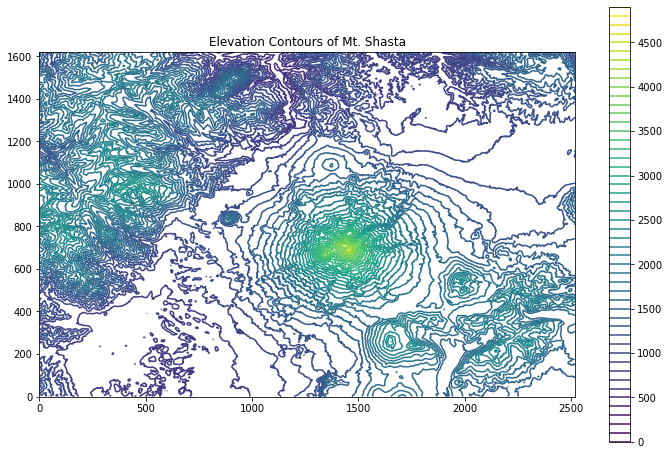

In [9]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

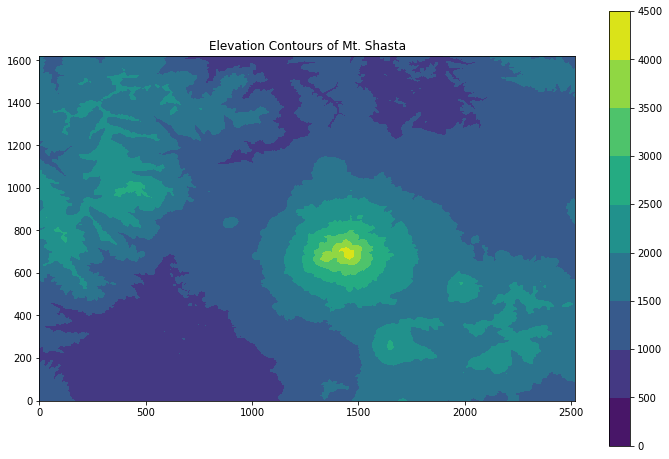

In [10]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Elevation Contours of Mt. Shasta")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()